# Backprop guide: a backprop narrative

This was originally a guide for teaching week 5 of the Andrew Ng course, but it got out of control. The text is pretty long, but it has all my understanding of basic neural networks.

# Further reading

* Andrew Ng Machine Learning Coursera, [weeks 4 and 5](https://www.coursera.org/learn/machine-learning#syllabus)
* Elements of Statistical Learning: Chapter 11, Neural Networks ([get a copy](https://web.stanford.edu/~hastie/ElemStatLearn/))
* Computer Age Statistical Inference: Chapter 18, Neural Networks and Deep Learning (p. 351) ([get a copy](https://web.stanford.edu/~hastie/CASI/))
* [Peter's Notes](http://peterroelants.github.io/posts/neural_network_implementation_part01/) are a bit mathy and specific, but I've found them helpful when confused
* [Deep Learning Basics](http://alexminnaar.com/deep-learning-basics-neural-networks-backpropagation-and-stochastic-gradient-descent.html), a guide that covers about the same ground as this one
* [A Step by Step Backpropagation Example](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/) using actual numbers

# Introduction

## What this covers

This covers the classic neural network, called the mutli-layer perceptron model, the feed-forward model, or the densely-connected neural network. It is made of a network of units that process information together.

What's the point of the feed forward model? It acts like an overcharged logistic regression, powerful enough to do some basic machine learning tasks. It's pretty simple in its construction, so it's a favourite project for beginners.

If you are familiar with logistic regressions, you will recognize some aspects of the feed forward network. The feed forward network is a network of logistic regressions.

![Regression Relation](Images/intro_logit_and_mlp.png "Regression Relation")

The downside of the feed forward model is its simplicity: it isn't spectacular on more interesting tasks, such as image classification and natural language processing. You could say it's a bit inflexible. As an added penalty on top of this inflexibility, the feed forward is a black box you can't look inside to see what's going on.

Here is a short glossary you can refer to if you run into unknown terms here or elsewhere:

* Model: in the classical sense, it's a representation of a real-world process. A neural network is a model because it approximates the real-life process that transforms the input data into the output data.
* Loss, cost, objective function: generally mean the same thing, but can be used specifically. These are how neural networks quantify error. The goal of this neural network is to minimize these functions.
* Neuron, perceptron: the neural network units and its point of reference. Data flows into the neurals and information flows out of it. In diagrams they appear as nodes.

# Deep dive

## The basic unit: the perceptron

The following diagram shows a perceptron.

![Just a lonely neuron](Images/intro_perceptron.png "Just a lonely neuron")

Depending on its setup, it may be known as a neuron, a linear classifier, a linear regression (identity), or a logistic regression (sigmoid).

## Feed forward basics

A neural network is a stack of layers of perceptrons working together, and the term feed forward refers to "feeding" data through this network from start to finish. As you can see with the arbitrary example below, that can be a lot of feeding.

![A lot](Images/intro_ManyNeurons.png "A lot")

The diagram above is just to scare you. Neural networks typically have *a lot* more connections!

[*Drawn with this python script*](https://gist.github.com/craffel/2d727968c3aaebd10359#file-draw_neural_net-py)

### Numpy importing

To get started, we'll need to import `numpy` to deal with all the matrices involved.

Each NN library you use will have a way of handling matrices. They tend to be similar and might even just work with `numpy` matrices seemlessly.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

### Values flowing

In a neural network, values flow through layers of synapses and neurons. This is called feed-forward.

Everything is passed forward to whatever is down the line. A neuron like the one below feeds information to many other neurons in the network.

![Everything flows](Images/intro_perceptron_feed.png "Everything flows")

To feed-forward data through a neural network is to pass data through the network's weights and activation functions to create an output. The feed-forward receives its data at the input layer, a copy of the input. The activity begins at the first hidden layer, when the input signal is passed through synapses (weights), and adjusted (bias) and transformed (activation function) by the neuron. Here is what it does:

#### First hidden layer

Signal $x$ passing though weights $w_1$: $x \times w_1$

Signal adjusted by neuron bias $b_1$: $x \times w_1 + b_1 = z_1$

Signal shaped by activation function $\sigma$: $a_1 = \sigma(z_1)$

Let's look at that more closely. The $w_1$ matrix (weights) is the collection of "synapses" of the "neurons": they are the connections the neurons use to pull in data. These synapses can be increased to amplify an incoming variable, set to zero to ignore one, or made negative to invert the inbound signal. During training they are tuned by the neurons to help the NN minimize prediction error.

The biases $b_1$ are unique to each neuron. They're used by the neuron to adjust what they receive.

The activation function $\sigma$, the sigmoid function, causes the neuron to output a binary signal. Unlike a digital computer though, the signal can range *between* 0 and 1 if the neuron is unsure.

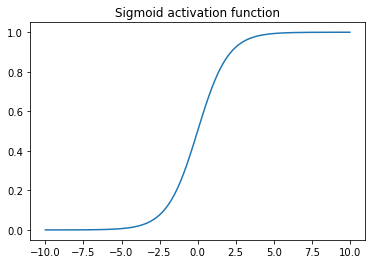

In [26]:
x=np.linspace(-10,10,100)
plt.plot(x,1/(1 + np.exp(-x)))
plt.title('Sigmoid activation function')
plt.show()

* Synapses strengthen or weaken incoming variables with their weights
* Biases adjust the sum of these weighted signals
* Neuron does a weighted sum of everything and transforms it with its activation function

The weights are matrices with dimensions $in \times out$, $in$ the size of the data coming in and $out$ the size of the data coming out. $out$ is the number of neurons in the layer, and $in$ is the amount of values each of these neurons is fed during feed-forward. The biases are $1 \times out$, one bias for each neuron.

![Dimensions](Images/intro_NeuronSimple.png "Dimensions")

Above you can see that the input data is 3 values and that each neuron has 3 synapses ($2 \times 3 = 6$ in total). There are 2 neurons in the layer and they produce 2 outputs, one each neuron. There are also 2 biases integrated inside the 2 neurons.

Each layer has only two quantities: how much comes in and how much goes out.

The first aspect of the feed-forward is then the flowing of data through weights, biases, and activation functions.

### Neurons working

A neural network has a dual nature: a linear nature at the unit level and a complex non-linear nature at the network level.

The neurons' linear nature helps them perform computations. They each get their own copy of the data to work on. This amazing trick is possible because of matrix multiplication (or dot product). Rows don't mix with other rows, neither columns with other columns.

#### Matrices are fun

Here is a trivial but familiar example. You can see that each neuron (column) does its own thing. Change one of the weight's element to see the effect on the output. The five neurons' outputs are the five elements in the output array.

In [27]:
     x = np.array([[1, 2, 3, 4, 5]])

weight = np.array([[1, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 1]])
x.dot(weight)

array([[1, 2, 3, 4, 5]])

![Simple matrix multiply](Images/intro_matrix_identiy.png "Simple matrix multiply")

I will give you my own example of using the neurons' synapses to play with the input data. I can perform operations on the inputs separately for each neuron. Look at each weight column vertically.

For example, $(-1 \cdot 1) + (0 \cdot 2) + (2 \cdot 3) + (0 \cdot 4) + (0 \cdot 5) = 5$.

In [28]:
      x = np.array([[1,  2,  3,  4,  5]])

weight = np.array([[-1,  0,  0,  0,  0],  # 1 the
                   [ 0,  2,  0,  0,  0],  # 2 numbers
                   [ 2,  0,  1, -1,  0],  # 3 go down
                   [ 0,  0,  0,  0, -1],  # 4 like
                   [ 0,  0,  0,  1,  1]]) # 5 this
x.dot(weight)

# I could also just flip the identity matrix horizontally to do this

array([[5, 4, 3, 2, 1]])



Matrix algebra allows the NN to perform arithmetic.

#### The non-linear mixing

Data is not mixed within a layer, but it is mixed between them. Neural networks get their power from the interactions of their hidden layers.

But power means nothing if it's only ever summed together in a big pile.

The model is linear within a layer, but it passes through a non-linearity between layers. Neural networks get their logical "thinking" ability from these non-linearities.

When you take a single-layer model like a logistic regression and replicate copies of it into a network, you get a model than can adapt to more than one situation.

Here is an example with logic gates.

![Truth tables](Images/intro_truth_table.png "Truth tables")

* Adding: you can just summing
* OR: you need the sigmoid to drive the output high as soon as input is present
* NAND: you need the sigmoid to stay high until both inputs are present, then deactivate completely
* XOR: you can't do this in one step, but you can combine OR and NAND together

The feed-forward is a mixing of data over many layers of neurons. Each layer expands data into multiple copies and its neurons compress it back into a few outputs. In the diagram above you see 3 units of inputs expanded into 6 synapse signals and then collapsed into 2 output signals. The power of the neural network comes from the fact that the next layer *then copies* these 2 output signals to each of its own neurons, so everything affects everything.

![Colorful](Images/intro_Colorful.png "Colorful")

As you can see in the example above, data expands and contracts. It is also generously connected.

Or in other words, feed-forward is like a decision reached by successive committees. The neurons in a layer form a committee that looks at data together, performs analysis, and then summarizes its findings into a small report. Higher committees then analyze this report at a higher level, and so on. The final output layer makes a decision based on the accumulated wisdom of the executive summary it receives: it outputs a single value between 0 and 1.

In the committee example, the office workers use

* weights to increase, decrease or invert the importance of data
* biases to make their voices louder or weaker
* activation functions to simply their reports into a range [0,1]

The expansion and contraction of information is repeated multiple times in the neural network.

All this mixing allows the neural network to work with very complicated data.

### Hiddens layers feed-forwarding

With all that in mind, this is the feed-forward:

1. $z_1 = X W_1 + B_1$
2. $a_1 = \sigma(z_1)$
3. $z_2 = a_1 W_2 + B_2$
4. $a_2 = \sigma(z_2)$
5. $z_{output} = a_2 W_{output} + B_{output}$
6. $a_{output} = \sigma(z_{output})$

By way of comparison, here is Andrew Ng's notation.

1. $a^{(1)} = x$
2. $z^{(2)} = \theta^{(1)} a^{(1)})$
3. $a^{(2)} = g(z^{(2)})$
2. $z^{(3)} = \theta^{(2)} a^{(2)})$
3. $a^{(3)} = g(z^{(3)})$
2. $z^{(4)} = \theta^{(3)} a^{(3)})$
6. $a_{(4)} = h_{\theta}(x)=g(z^{(4)})$

Let's generate some data. Thanks to the properties of matrix multiplication, I can have 4 rows of input data and these will be processed fully separately, yielding 4 rows of output data.

In [29]:
x = np.random.random((4,5)) # Four records of 5 variables
b1 = np.random.random((1,3)) # Bias: 1 x layer_1_size
w1 = np.random.random((5,3)) # Weight: input_vars x layer_1_size
b2 = np.random.random((1,2)) # Bias: 1 x layer_2_size
w2 = np.random.random((3,2)) # Weight: layer_1_size x layer_2_size
b_out = np.random.random((1,1)) # Bias: 1 x output_size
w_out = np.random.random((2,1)) # Weight: layer_2_size x output_size

Here are the activations of all the layers participating in the feed forward.

In [30]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# First hidden layer, three neurons each give an output
z1 = x.dot(w1) + b1
a1 = sigmoid(z1)
print(a1)

[[ 0.83836843  0.91233646  0.79597908]
 [ 0.92638387  0.93010051  0.83676269]
 [ 0.91310152  0.95530761  0.87179181]
 [ 0.92764     0.93849366  0.88610275]]


In [31]:
# Second hidden layer, two neurons each give an ouput
z2 = b2 + a1.dot(w2)
a2 = sigmoid(z2)
print(a2)

[[ 0.88372231  0.93019092]
 [ 0.88914692  0.9364722 ]
 [ 0.89342689  0.9382375 ]
 [ 0.89353883  0.93868309]]


In [32]:
# Output layer: one output for each input record
z_out = b_out + a2.dot(w_out)
a_out = sigmoid(z_out)
print(a_out)

[[ 0.87086418]
 [ 0.87187312]
 [ 0.87243173]
 [ 0.87247545]]


## Back propagation I

Backprop is how the network evaluates its performance during feed forward.

### Intuition

If the feed-forward is data pushed all the way forward to the outputs, then back-propagation is the trickling down of errors flowing back from the outputs all the way back to the very first hidden layer.

Backprop is a way of using gradient descent on neural networks of multiple layers. It isn't necessary with a linear or logistic regression because these are simple single-layer networks. Back-propagation allows you to apply gradient descent more than once.

It all starts at the output. Here there is a clear link between the choice of parameters (weights and biases) and the output error. The approach here is the same as simple gradient descent.

At the layer preceeding the output, we'll call it $l_2$, there is an extra step. What is the link between $l_2$ weights and biases and the output error? It has multiple steps: $l_2$ has a direct effect on the output layer's data, and the output layer's data has a direct effect on what the model decides to output. It takes two steps to get back to the end.

In other words, the output layer is the boss and it is directly responsible for the model's error. If the output layer changes its behaviour, it can directly improve its accuracy. It's the easiest to train.

The hidden layers are not directly responsible for the model's error; however, they are responsible for providing the output layer accurate analyses of the model's input data. Knowing their boss, they have an idea of how to change their computations so that the big cheese makes more informed decisions. Their gradient formulas in fact depend on the output layer's weights (the boss's personality, you might say).

## Detour: gradient checking

Backprop takes snapshots of errors everywhere in the NN and uses these to adjust parameters. Normally this is done with calculus and repeated applications of the chain rule of differentiation.

Backprop can also be done by more primitive methods, albeit much more slowly. Numerical differentiation is used to teach students calculus, so it makes sense to show it here first before breaking out the chain rule.

The idea behind numerical differentiation is this: 

1. Take your NN as is
2. Adjust a parameter slightly and see the effect on output error
3. You now know the effect of that parameter on error

Given $J(\theta_{i,j})$ your cost function, $\theta$ any parameter anywhere in the neural network, and $\epsilon$ a small value as a "nudge", 

$$\frac{\partial J(\theta)}{\partial \theta_{i,j}} \approx \frac{J(\theta_{i,j} + \epsilon) - J(\theta_{i,j} - \epsilon)}{2\epsilon}$$

Backprop does this for every parameter in the NN. If it sees that error increases when a parameter is increased, it will decrease the parameter. The opposite is done with a parameter that increases error when it decreases.

Ultimately, this makes a neural network more complicated than any collection of corporate committees. Except in rare prophetic instances, an office worker will not know how many dollars their actions win/lose their company. With neural networks though, it is calculated.

We will incorporate gradient checking into a NN later.

## Back propagation II

I hope the above has made back propagation make some sense. It's now time for some light mathematics. Don't worry I'll just paste the answers and skip the algebraic Tetris.

Here are the gradients with respect to error for parameters in the NN model.

**Note 1:** With these equations, the most important part is whether they're positive or negative, so you can look at them to see what affects their sign. Gradient decsent will generally work alright as long as it's heading in the right direction (has the right sign).

**Note 2:** When a gradient is positive (error is increasing with parameter) you want to decrease the parameter. When the gradient is negative, you want to increase the parameter.

The gradients for the output layer weights and biases are

$$\frac{\partial J(\theta)}{\partial W_{out}} = a_2^T \cdot (a_{out} - y), \frac{\partial J(\theta)}{\partial B_{out}} = 1 \cdot (a_{out} - y)$$

The above equations make some sense. If the output neuron is overshooting the target, reduce the bias. It's a similar idea with the weights: if the weights cause the neuron to overshoot when they are given a positive input, they need to be reduced.

(You need the 1 in the bias gradient. It represents the intercept but is also necessary to get the right dimension.)

To proceed lower into the previous layer, we have to do some backprop. Here it is:

$$\delta_{out} = (a_{out} - y) \cdot W_{out}^T$$

We also need the derivative of the sigmoid function. We'll just call it $\sigma^\prime$.

We just have to include that in our equations and we'll be fine. The gradients for the second hidden layer are:

$$\frac{\partial J(\theta)}{\partial W_2} = a_1^T \cdot (\sigma^\prime(a_2) \circ \delta_{out}), \frac{\partial J(\theta)}{\partial B_2} = 1 \cdot \sigma^\prime(a_2) \circ \delta_{out}$$

The sigmoid derivative $\sigma^\prime$ is a newcomer, but otherwise these are similar to before. The weight gradients depend on layer 2's input, which comes from layer 1. The bias gradient is simpler, but it still has to pass through the $\sigma^\prime$ and the $\delta_{out}$.

For layer 1 we need a new delta.

$$\delta_2 = (\delta_{out} \circ \sigma^\prime(a_2)) \cdot W_2^T$$

Finally, the last backprop step.

$$\frac{\partial J(\theta)}{\partial W_1} = x^T \cdot (\sigma^\prime(a_1) \circ \delta_2), \frac{\partial J(\theta)}{\partial B_1} = 1 \cdot \sigma^\prime(a_1) \circ \delta_2$$

That's all there is to it.

## Gradient interpretation

In this section, I'll do my best to narrate what back propagation is doing. Feel free to skip this section.

Back propagation is a repeated application of the chain-rule of differentiation, and its purpose is to determine the effect of a parameter on model error, which is the error gradient with respect to the parameter ($W_1$, $B_{out}$, etc).

Let's take the weight update below as an example, starting with the $a_1^T$ term.

$$\frac{\partial J(\theta)}{\partial W_2} = a_1^T \cdot (\sigma^\prime(a_2) \circ \delta_{out})$$

Recall that $W_2$'s role in the neural network is to do the following:

$$a_2 = \sigma(a_1 W_2 + B_2), z_2 = a_1 W_2 + B_2$$

Let's put everything together by answering the question: *how does $W_2$ affect $z_2$?*

The answer: *$W_2$ affects $z_2$ through its interaction with $a_1$.*

The derivative $\frac{\partial z_2}{\partial W_2} = \frac{\partial a_1 W_2 + B_2}{\partial W_2} = a_1$ signifies that $z_2$ increases by $a_1$ when $W_2$ increases by 1. This works out nicely here since $a_1 W_2$ is linear; normally though the derivative "slope" only holds in a very small area around the current point.

This is where the $a_1^T$ in the gradient comes from. What does it mean? It means that $W_2$'s job is to multiply $a_1$, so its contribution to the model output is $a_1$. Since model error is closely related to model output (through the cost function), $a_1$ is also $W_2$'s contribution to model error.

That covers $a_1^T$.

Let's now look at that $\sigma^\prime(a_2)$ term.

$\sigma^\prime(a_2)$ is the sigmoid's contribution to error. $W_2$'s contribution to error, seen above, passes through the simgoid prime. The derivative of the sigmoid function is $\sigma(a_2)^\prime = \sigma(a_2) (1 - \sigma(a_2))$. Looking at it a bit, it becomes apparent that the derivative reaches its maximum value when $\sigma(a_2) = 1 - \sigma(a_2)$, or when $\sigma(a_2) = 0.5$ or $a_2 = 0$. The slope of the derivative vanishes when $a_2$ approaches 0 or 1. Thus the sigmoid's contribution to error: it restricts the flow of error depending on the value of $a_2$ fed to it, $\sigma^\prime(a_2)$.

Story so far: $\frac{\partial J(\theta)}{\partial W_2}$ is $a_1$ passed through $\sigma^\prime$, the latter at most being 0.5 but possibly 0.0.

The next component of $W_2$'s gradient is $\delta_{out} = (a_{out} - y) \cdot W_{out}^T$.

We are seeing $W_{out}$ here because $W_2$'s effect must pass through it to reach the model error. The idea here is that stronger $W_{out}$ values mean that whatever $x W$ outputs will be mangnified, while weaker $W_{out}$ will attenuate $W_2$'s influence. Therefore $W_{out}$ is a part of $W_2$'s effect on error.

$(a_{out} - y)$ is more difficult to explain because it is an algebraic simplication. Its full form is $\frac{\partial NLL_{cost} \sigma(a_{out})}{\partial a_{out}}$. But that isn't too important. The first role of $a_{out} - y$ is to keep the gradient positive if $a_{out} > y$ but turn it negative if $a_{out} < y$: this makes sense since you want to increase/lower $a_{out}$ if it has undershot/overshot y. The second role of $a_{out} - y$ is to return a higher error value the wider a gap there is between model output and true output: this gap resides in $[-1, 1]$ since all outputs belong in $[0, 1]$.

There you have it. I hope this has helped you understand gradients a little bit better.